<a href="https://colab.research.google.com/github/heyanuja/OptimusPython/blob/main/beat_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://github.com/paulvangentcom/heartrate_analysis_python/blob/master/examples/1_regular_PPG/Analysing_a_PPG_signal.ipynb


In [ ]:

#files.upload()
#!mkdir ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

#!kaggle datasets list -s fatigue
#!kaggle datasets download -d canaria/5-gamers -p /content
#!mkdir train

#!unzip 5-gamers.zip -d train

!ls
#d = pd.read_csv('training.1600000.processed.noemoticon.csv')
#d.head()

5-gamers.zip		   gamer3-annotations.csv     gamer5-ppg-2000-01-01.csv
gamer1-annotations.csv	   gamer3-ppg-2000-01-01.csv  gamer5-ppg-2000-01-02.csv
gamer1-ppg-2000-01-01.csv  gamer3-ppg-2000-01-02.csv  kaggle.json
gamer1-ppg-2000-01-02.csv  gamer4-annotations.csv     sample_data
gamer2-annotations.csv	   gamer4-ppg-2000-01-01.csv  train
gamer2-ppg-2000-01-01.csv  gamer4-ppg-2000-01-02.csv
gamer2-ppg-2000-01-02.csv  gamer5-annotations.csv


In [ ]:
#Import data
df = pd.read_csv('train/gamer1-ppg-2000-01-01.csv')
#df.keys() #Index(['Time', 'Red_Signal'], dtype='object')

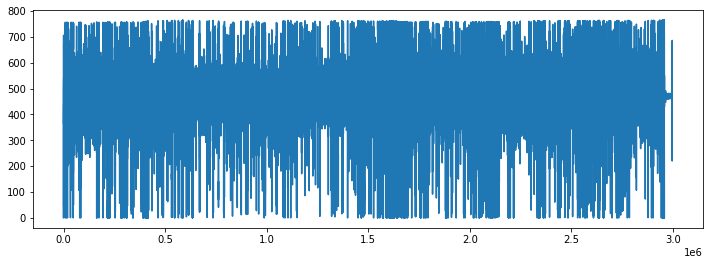

ValueError: ignored

In [ ]:
#Load PPG signal
signal = df['Red_Signal']
timer = df['Time']

#Visualise data
plt.figure(figsize=(12,4))
plt.plot(signal)
plt.show()

sample_rate = hp.get_samplerate_datetime(timer, timeformat = '%H:%M:%S.%f')
print('sampling rate is: %.3f Hz' %sample_rate)


In [ ]:
#run the analysis
wd, m = hp.process(signal, sample_rate)

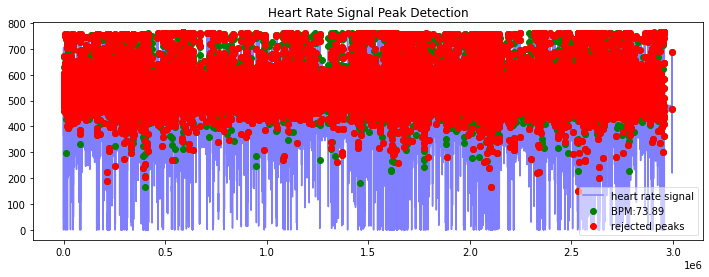

bpm: 73.892312
ibi: 811.992455
sdnn: 178.857238
sdsd: 115.475802
rmssd: 168.635678
pnn20: 0.887938
pnn50: 0.710864
hr_mad: 146.515358
sd1: 118.881671
sd2: 205.949614
s: 76917.605519
sd1/sd2: 0.577237
breathingrate: 0.151714


In [ ]:
#set large figure
plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))


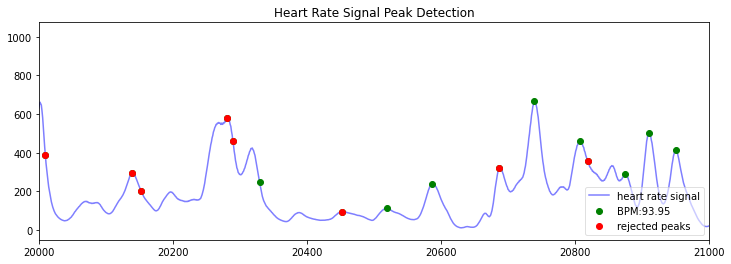

In [ ]:
#let's zoom in on a bit
plt.figure(figsize=(12,4))
plt.xlim(20000, 22000)
hp.plotter(wd, m)

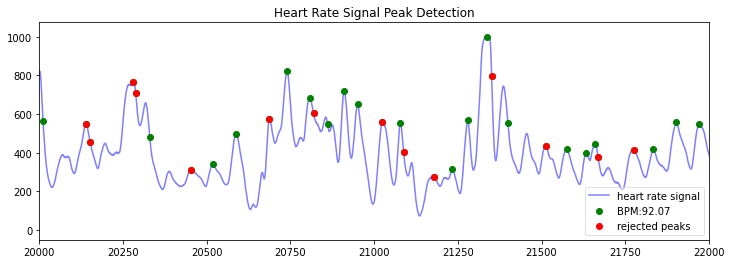

In [ ]:
enhanced = hp.enhance_peaks(signal, iterations=1)

#run the analysis
wd, m = hp.process(enhanced, sample_rate)

plt.figure(figsize=(12,4))
plt.xlim(20000, 22000)
hp.plotter(wd, m)

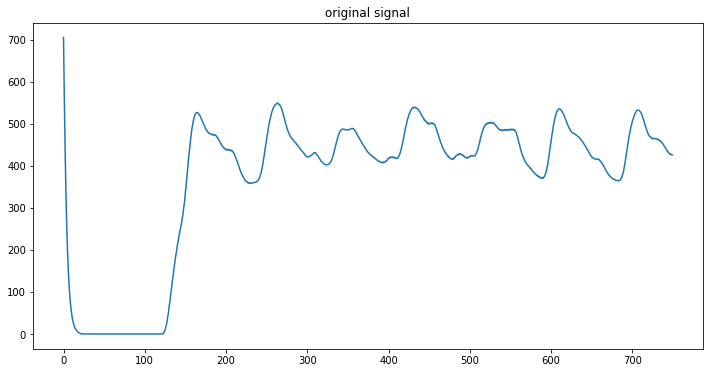

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(signal[0:int(10 * sample_rate)])
plt.title('original signal')
plt.show()


In [ ]:
#Let's run it through a standard butterworth bandpass implementation to remove everything < 0.8 and > 3.5 Hz.
  #for very noisy data ex: from a wristband sensor (apple watch etc)
def bandpass(signal):
  filtered = hp.filter_signal(signal, [0.7, 3.5], sample_rate=sample_rate, 
                              order=3, filtertype='bandpass')

  #let's plot first 240 seconds and work with that!
  plt.figure(figsize=(12,12))
  plt.subplot(211)
  plt.plot(signal[0:int(240 * sample_rate)])
  plt.title('original signal')
  plt.subplot(212)
  plt.plot(filtered[0:int(240 * sample_rate)])
  plt.title('filtered signal')
  plt.show()

  plt.figure(figsize=(12,6))
  plt.plot(filtered[0:int(sample_rate * 60)])
  plt.title('60 second segment of filtered signal')
  plt.show()

  return filtered

#filtered = bandpass(signal)

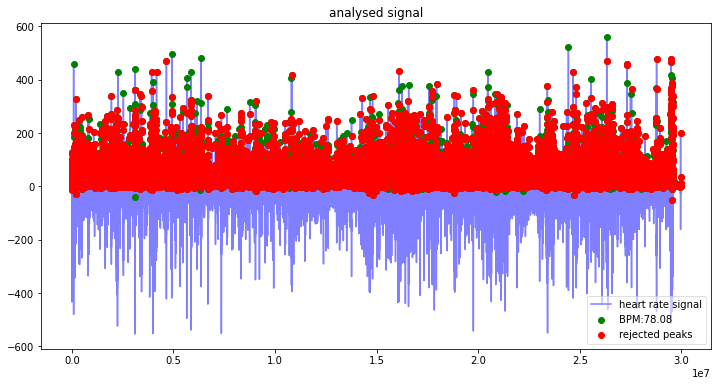

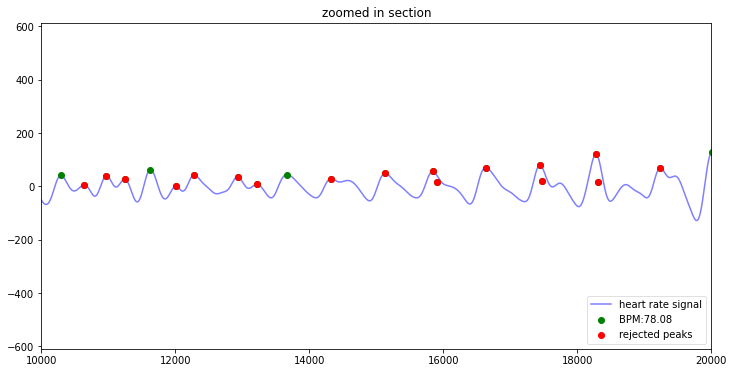

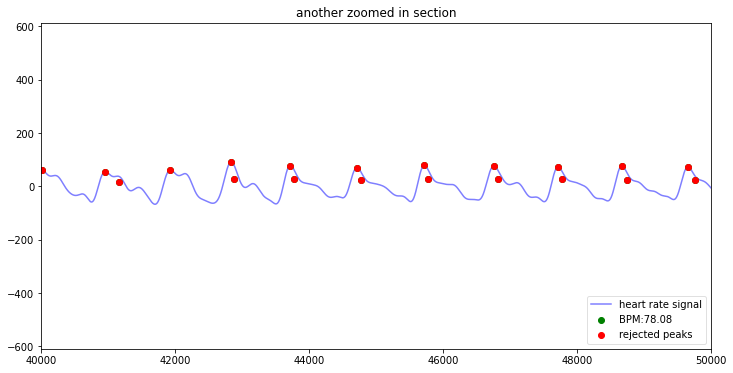

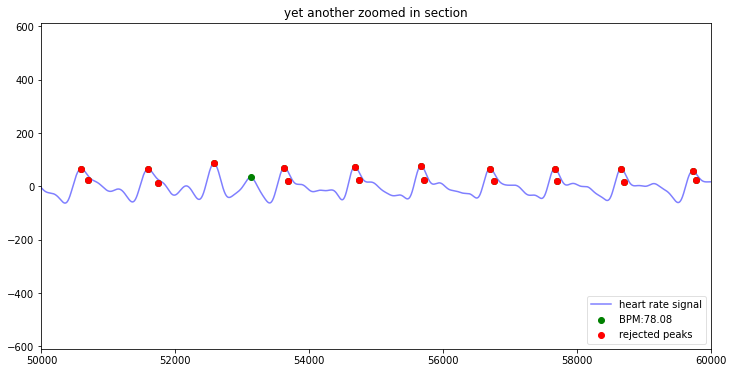

bpm: 78.076961
ibi: 768.472537
sdnn: 151.458685
sdsd: 42.519752
rmssd: 74.375661
pnn20: 0.799577
pnn50: 0.530370
hr_mad: 94.569004
sd1: 51.805388
sd2: 190.011258
s: 30924.603301
sd1/sd2: 0.272644
breathingrate: 0.047233


In [ ]:
#let's resample to ~100Hz as well
#10Hz is low for the adaptive threshold analysis HeartPy uses
from scipy.signal import resample

resampled = resample(filtered, len(filtered) * 10)

#don't forget to compute the new sampling rate
new_sample_rate = sample_rate * 10

#run HeartPy over it, fingers crossed
wd, m = hp.process(resampled, sample_rate = new_sample_rate, 
                   high_precision=True, clean_rr=True)

#and plot the result
plt.figure(figsize=(12,6))
hp.plotter(wd, m, title = 'analysed signal')

#zoom in a bit
plt.figure(figsize=(12,6))
plt.xlim(10000, 20000)
hp.plotter(wd, m, title = 'zoomed in section')

plt.figure(figsize=(12,6))
plt.xlim(40000, 50000)
hp.plotter(wd, m, title = 'another zoomed in section')

plt.figure(figsize=(12,6))
plt.xlim(50000, 60000)
hp.plotter(wd, m, title = 'yet another zoomed in section')

#hp.plot_poincare(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))